Direct methods for the solution of Linear Systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import math

1.


In [5]:
def analyze_matrices(func,dims,vand=False):
    relative_errors, condition_2_norm, condition_inf_norm = [], [], []
    for i in dims:
        #computing the matrix A
        A=func(i)

        #computing the true solution x_true and the right hand side b
        x_true=np.ones(i)
        b=np.dot(A,x_true)

        #appending the condition numbers to the lists
        condition_2_norm.append(np.linalg.cond(A,2))
        condition_inf_norm.append(np.linalg.cond(A,"f"))

        #computing the solution x
        x=np.linalg.solve(A,b)

        #computing the relative error(appending it to the list)
        relative_errors.append(np.linalg.norm(x-x_true,2)/np.linalg.norm(x_true,2))

    #plot the relative error
    plt.figure()
    plt.plot(dims,relative_errors)
    plt.xlabel("Matrix dimension")
    plt.ylabel("Relative error")
    plt.show()

    #plot the condition numbers
    plt.figure()
    plt.plot(dims,condition_2_norm,label="2-norm")
    plt.plot(dims,condition_inf_norm,label="inf-norm")
    plt.legend()
    plt.xlabel("Matrix dimension")
    plt.ylabel("Condition number")
    plt.show()

A random matrix (created with the function np.random.rand()) with size varying with n ={10,20,30,...,100}.

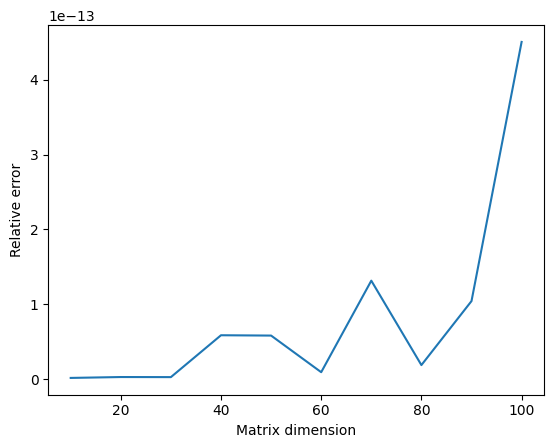

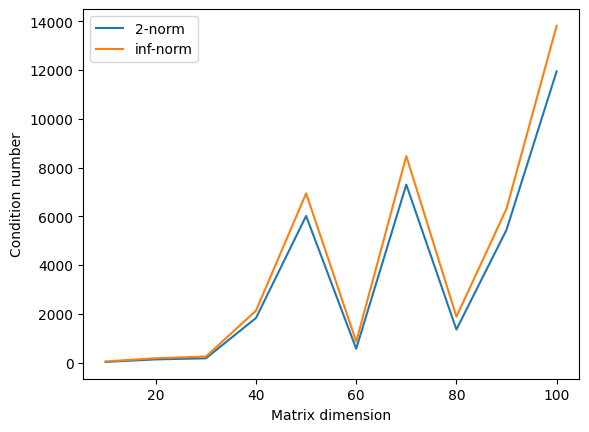

In [6]:
def random_matrix(n):
    return np.random.rand(n,n)
random_dimensions=np.arange(10,101,10)
analyze_matrices(random_matrix,random_dimensions)

The Vandermonde matrix (np.vander) of dimension n = {5, 10, 15, 20, 25, 30} with respect to the vector x = {1,2,3,...,n}.

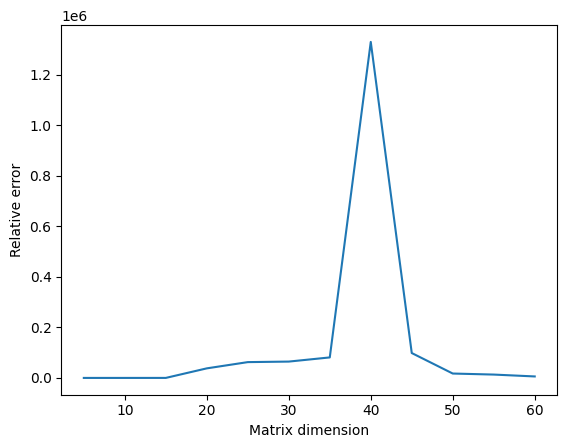

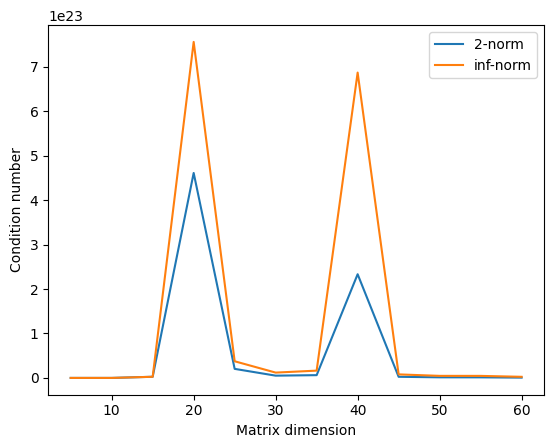

In [14]:
def van_der_monde(n):
    x=np.arange(1,n+1)
    return np.vander(x, n)
     
van_der_monde_dimensions=np.arange(5,61,5)
analyze_matrices(van_der_monde,van_der_monde_dimensions)

The Hilbert matrix (scipy.linalg.hilbert) of dimension n = {4, 5, 6, . . . , 12}.

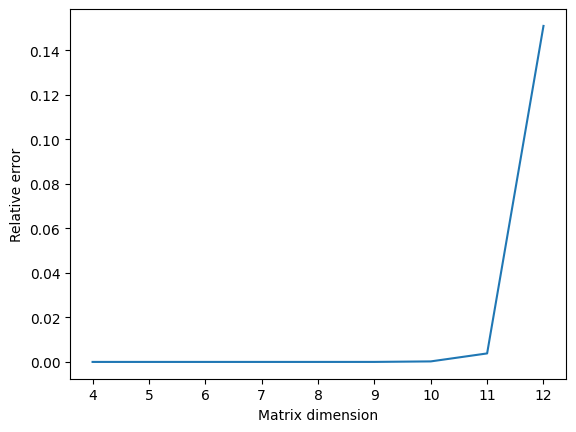

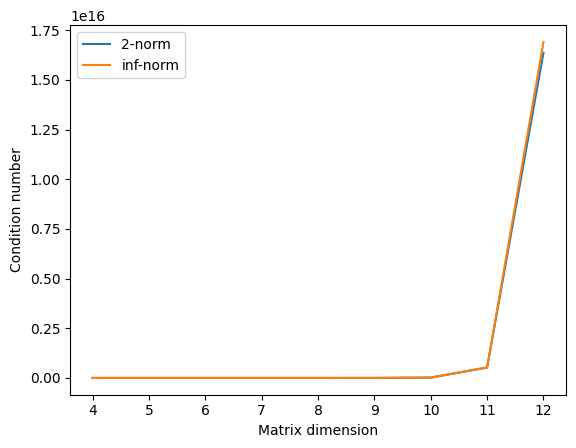

In [24]:
def hilbert_matrix(n):
    return scipy.linalg.hilbert(n)
hilbert_dimensions=np.arange(4,13)
analyze_matrices(hilbert_matrix,hilbert_dimensions)

Floating Point Arithmetic

1.
The Machine epsilon $\epsilon$ is the distance between $1$ and the next floating point number. Compute $\epsilon$, which
is defined as the smallest floating point number such that it holds:

$$fl(1 + \epsilon) > 1$$

In [ ]:
eps = 1

while 1.0 + eps > 1.0:
    eps /= 2.0

eps *= 2.0

print(" (ε):", eps)

 (ε): 2.220446049250313e-16


2.


In [ ]:
def calculate_sequence(n):
    return (1.0 + 1.0/n)**n

print(f"e={math.e}")
for i in range(1,20):
    result = calculate_sequence(10**i)
    print(f"For n = {10**i} (10^{i}):\n result= {result:.10f}, |result-e|: {abs(result - math.e):.10f}\n")



e=2.718281828459045
For n = 10 (10^1):
 result= 2.5937424601, |result-e|: 0.1245393684

For n = 100 (10^2):
 result= 2.7048138294, |result-e|: 0.0134679990

For n = 1000 (10^3):
 result= 2.7169239322, |result-e|: 0.0013578962

For n = 10000 (10^4):
 result= 2.7181459268, |result-e|: 0.0001359016

For n = 100000 (10^5):
 result= 2.7182682372, |result-e|: 0.0000135913

For n = 1000000 (10^6):
 result= 2.7182804691, |result-e|: 0.0000013594

For n = 10000000 (10^7):
 result= 2.7182816941, |result-e|: 0.0000001343

For n = 100000000 (10^8):
 result= 2.7182817983, |result-e|: 0.0000000301

For n = 1000000000 (10^9):
 result= 2.7182820520, |result-e|: 0.0000002236

For n = 10000000000 (10^10):
 result= 2.7182820532, |result-e|: 0.0000002248

For n = 100000000000 (10^11):
 result= 2.7182820534, |result-e|: 0.0000002249

For n = 1000000000000 (10^12):
 result= 2.7185234960, |result-e|: 0.0002416676

For n = 10000000000000 (10^13):
 result= 2.7161100341, |result-e|: 0.0021717944

For n = 100000


The error consistently reaching exactly 1.7182818285 for values of $n >= 10^{16}$ is due to the limitations of floating-point precision in computers. When  $N$ becomes extremely large, such as greater than $10^{16} $, the value of $\frac{1}{N}$ becomes exceedingly small. This value is so small that it falls below the precision threshold of the floating-point representation used by the computer. Consequently, the computer cannot accurately represent such a small number, and it effectively rounds $\frac{1}{N}$ down to zero.

As a result, when the program computes $ 1 + \frac{1}{N} $, it actually computes $1 + 0$, which is just 1. This loss of precision leads to the observed error of 1.7182818285 for very large values of $N$, as the calculations involving $ \frac{1}{N} $ no longer affect the result in a meaningful way.


3.


In [ ]:
A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])

rank_A = np.linalg.matrix_rank(A)
rank_B = np.linalg.matrix_rank(B)
detA = np.linalg.det(A)

eigen_val_A,eigen_vec_A = np.linalg.eig(A)
eigen_val_B,eigen_vec_B = np.linalg.eig(B)
detB=np.linalg.det(B)

print("Matrix A:")
print("Rank:", rank_A)
print("Eigenvalues:", eigen_val_A)
print("Eigenvectors:",eigen_vec_A)
print("Determinant: ", detA)
print("Is full-rank:", rank_A == min(A.shape))

print("\n\nMatrix B:")
print("Rank:", rank_B)
print("Eigenvalues:", eigen_val_B)
print("Eigenvectors:")
print("Eigenvectors:",eigen_vec_B)
print("Determinant: ", detB)
print("Is full-rank:", rank_B == min(B.shape))

Matrix A:
Rank: 2
Eigenvalues: [5. 2.]
Eigenvectors: [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]
Determinant:  10.000000000000002
Is full-rank: True


Matrix B:
Rank: 1
Eigenvalues: [5. 0.]
Eigenvectors:
Eigenvectors: [[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]
Determinant:  0.0
Is full-rank: False


The matrix $B$ is not of full rank; it has a rank of 1. This is because its columns are not linearly independent. In fact, the first column is twice the second column. As a consequence of this linear dependence, one of the eigenvalues of $B$ is 0.
Below we can see another example:

In [ ]:
C = np.array([[5,4,2],[1,2,3],[2,4,6]])
eigen_val_C,eigen_vec_C = np.linalg.eig(C)
rank_C = np.linalg.matrix_rank(C)
detC = np.linalg.det(C)

print("Matrix C:")
print("Rank:", rank_C)
print("Eigenvalues:", eigen_val_C)
print("Eigenvectors:",eigen_vec_C)
print("Determinant: ", detC)
print("Is full-rank:", rank_C == min(C.shape))

Matrix C:
Rank: 2
Eigenvalues: [ 9.70156212e+00  3.29843788e+00 -1.38777878e-16]
Eigenvectors: [[ 0.60556827  0.90306703  0.48776861]
 [ 0.35588961 -0.19207808 -0.79262399]
 [ 0.71177922 -0.38415616  0.36582646]]
Determinant:  0.0
Is full-rank: False


In this case similar to the previous part, the third column of $A$ matrix is twice it's second column. So, the columns are not linearly independent, the determinant is 0 and it contains a 0 eigenvalue(the third eigenvalue is not exactly equal to zero due to the machine precision).